# 1. A database for a time-domain survey (Creation of my database)

In [8]:
%pylab
# IPython has a built-in mode to work cleanly with matplotlib figures, this is one way to invoke it.

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
import sqlite3 as sq
from astropy.table import vstack, Table
import glob
import os
import pandas as pd
import numpy as np
# Import neccessary libraries
%matplotlib inline 

In [10]:
import seaborn as sns #nice plots
sns.set(style="white")

In [11]:
info = Table.read('/home/juancho/Master/Semester3/DBDM/DDM2017_FinalProject/FinalProject/Q1/Tables/file_info_for_problem.csv',format='ascii.csv')
# Read the information file with the headers of the files (this is my laptop's path to the files)

In [12]:
info
# Simply show the information contained in the tables (not relevant in the process of creating of the table)

ID,FieldID,Filename,Filter,MJD,Airmass,Exptime
int64,int64,str36,str2,float64,float64,float64
1,1,Z-ADP.2017-01-18T11:58:36.905.fits,Z,57267.1671072,1.6405,40.0
2,1,J-ADP.2017-01-18T11:58:35.781.fits,J,57257.0504323,1.0105,48.0
3,1,H-ADP.2017-01-18T11:58:35.780.fits,H,57257.044108,1.006,16.0
4,1,Ks-ADP.2016-05-25T15:33:39.546.fits,Ks,56788.346937,1.023,16.0
5,1,Ks-ADP.2017-01-18T11:58:39.907.fits,Ks,56561.0020158,1.079,16.0
6,1,Ks-ADP.2016-05-25T15:33:43.377.fits,Ks,56829.0390512,1.6085,16.0
7,1,Y-ADP.2017-01-18T11:58:36.901.fits,Y,57267.1596647,1.5605,40.0
8,2,Z-ADP.2017-01-18T11:58:36.905b.fits,Z,57268.1671072,1.6405,40.0
9,2,J-ADP.2017-01-18T11:58:35.781b.fits,J,57258.0504323,1.0105,48.0


In [13]:
files = os.listdir("/home/juancho/Master/Semester3/DBDM/DDM2017_FinalProject/FinalProject/Q1/Tables")

# Create an empty array to add the real name of the files
see_names = []

# Fill the empty array with the names of the files that end with ".fits"
for names in files:
    if names.endswith(".fits"):
        see_names.append(names)

In [14]:
#see_names
# This line is meant to simply show see_names in order to inspect by eye the names so they match

In [15]:
# Now, using the Julian date as a reference, I want to match the name of the files that were displayed
# in the last line with their corresponding filename from the table.
# To do so, I manually match them and create by hand a list with this file and add it to "info"

names_to_match = ['Field-1-Z','Field-1-J','Field-1-H','Field-1-Ks-E002','Field-1-Ks-E001',
            'Field-1-Ks-E003','Field-1-Y','Field-2-Z','Field-2-J','Field-2-H',
            'Field-2-Ks-E001','Field-2-Y','Field-3-Z','Field-3-J','Field-3-H',
             'Field-3-Ks-E002','Field-3-Ks-E001','Field-3-Y']

In [16]:
info['name_file'] = names_to_match
# This command adds the new column with the other names of the files to "info"

In [17]:
info
# Simply show the updated Info (with the new column included)

ID,FieldID,Filename,Filter,MJD,Airmass,Exptime,name_file
int64,int64,str36,str2,float64,float64,float64,str15
1,1,Z-ADP.2017-01-18T11:58:36.905.fits,Z,57267.1671072,1.6405,40.0,Field-1-Z
2,1,J-ADP.2017-01-18T11:58:35.781.fits,J,57257.0504323,1.0105,48.0,Field-1-J
3,1,H-ADP.2017-01-18T11:58:35.780.fits,H,57257.044108,1.006,16.0,Field-1-H
4,1,Ks-ADP.2016-05-25T15:33:39.546.fits,Ks,56788.346937,1.023,16.0,Field-1-Ks-E002
5,1,Ks-ADP.2017-01-18T11:58:39.907.fits,Ks,56561.0020158,1.079,16.0,Field-1-Ks-E001
6,1,Ks-ADP.2016-05-25T15:33:43.377.fits,Ks,56829.0390512,1.6085,16.0,Field-1-Ks-E003
7,1,Y-ADP.2017-01-18T11:58:36.901.fits,Y,57267.1596647,1.5605,40.0,Field-1-Y
8,2,Z-ADP.2017-01-18T11:58:36.905b.fits,Z,57268.1671072,1.6405,40.0,Field-2-Z
9,2,J-ADP.2017-01-18T11:58:35.781b.fits,J,57258.0504323,1.0105,48.0,Field-2-J


In [18]:
# Now that the names match, I can create the database with all the relevant information. I found it easier
# to create a big data table because there are variables that can filter out any object with a simple SQL querie.
# My database is called "All_data"

# I create an empty table and read the files that have the information that I will add to that table
All_data = Table()

# The ID, Filter and FieldID are the variables that my new database and info have in common so I can
# use them to create the table and include all the information. 

for ii,files in enumerate(names_to_match):
    Files = Table.read('/home/juancho/Master/Semester3/DBDM/DDM2017_FinalProject/FinalProject/Q1/Tables/'+str(files)+'.fits',format='fits')
    for jj,alloc in enumerate(info):
        if alloc['name_file']   == files:
            Files['ID_fitsfile'] = np.ones(len(Files))*alloc['ID']
            Files['Filter']      = alloc['Filter']
            Files['FieldID']     = alloc['FieldID']
                        
    # Stack all the data to the table
    All_data = vstack([All_data,Files])

In [19]:
# With this line I just want to include a column with the S/N calculated from Flux1/dFlux1 beacuse it is 
# useful to have it there for further use on the data.

All_data['SN'] = All_data["Flux1"]/All_data["dFlux1"]

In [20]:
All_data
# Display the current contents of the table "All_data"

RunningID,X,Y,Flux1,dFlux1,Flux2,dFlux2,Flux3,dFlux3,Ra,Dec,Class,Mag1,dMag1,Mag2,dMag2,Mag3,dMag3,StarID,ID_fitsfile,Filter,FieldID,SN
Number,Pixels,Pixels,ADU,ADU,ADU,ADU,ADU,ADU,RADIANS,RADIANS,Flag,ADU,ADU,ADU,ADU,ADU,ADU,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,str2,int64,float32
9.0,6676.62,5.03455,2886.02,145.136,4697.14,205.506,6884.06,291.283,4.70662,-0.529796,-1.0,17.433,0.054601,17.4321,0.0475026,17.4231,0.0459405,0,1.0,Z,1,19.885
13.0,6841.46,5.31207,2585.4,144.623,4467.49,205.039,6966.38,290.953,4.7069,-0.529931,1.0,17.5525,0.0607343,17.4866,0.049831,17.4102,0.0453463,1,1.0,Z,1,17.8769
15.0,6355.06,5.88212,2765.64,145.052,4436.22,205.378,6540.06,291.163,4.70609,-0.529531,-1.0,17.4793,0.0569448,17.4942,0.050265,17.4788,0.048337,2,1.0,Z,1,19.0665
19.0,5897.49,7.52958,899.127,138.445,1464.07,197.921,2023.29,284.087,4.70533,-0.529153,-1.0,18.6992,0.167179,18.6978,0.146776,18.7526,0.152447,3,1.0,Z,1,6.49449
22.0,5809.89,6.13442,3412.75,140.556,5444.32,200.291,8012.71,286.57,4.70518,-0.529083,-1.0,17.251,0.0447169,17.2719,0.0399432,17.2583,0.0388309,4,1.0,Z,1,24.2803
14.0,6874.91,5.43629,4129.01,145.694,6773.71,206.173,9926.46,291.985,4.70695,-0.529958,-1.0,17.0442,0.0383108,17.0347,0.0330469,17.0257,0.0319368,5,1.0,Z,1,28.3403
12.0,6571.8,5.21043,3762.78,145.753,6288.57,206.302,9654.43,292.267,4.70645,-0.52971,1.0,17.145,0.0420567,17.1153,0.0356186,17.0559,0.0328684,6,1.0,Z,1,25.8161
17.0,6580.03,6.52743,2046.26,144.553,3359.13,204.849,4906.73,290.597,4.70647,-0.529715,1.0,17.8064,0.0766994,17.7962,0.0662116,17.7907,0.0643021,7,1.0,Z,1,14.1558


In [21]:
# In principle this database contains all the information that one may need for the requested queries and for 
# further data analysis. But, given the characteristic of the queries and the not-so straightforward handling
# of SQl, I will include some colours that I will use later on. (This makes the SQL queries easier and faster)

# First, I identify the objects that have magnitudes in the H,J and Y filters.

All_dataH = All_data[All_data["Filter"]=="H"]
All_dataJ = All_data[All_data["Filter"]=="J"]
All_dataY = All_data[All_data["Filter"]=="Y"]

# Then I simply calculate the colours in two other arrays

All_dataJH = All_dataJ["Mag1"][All_dataJ["StarID"] == All_dataH["StarID"]] - All_dataH["Mag1"][All_dataJ["StarID"] == All_dataH["StarID"]]
All_dataYJ = All_dataY["Mag1"][All_dataY["StarID"] == All_dataJ["StarID"]] - All_dataJ["Mag1"][All_dataY["StarID"] == All_dataJ["StarID"]]

#All_data['JH_colour'] = All_dataJ["Mag1"][All_dataJ["StarID"] == All_dataH["StarID"]] - All_dataH["Mag1"][All_dataJ["StarID"] == All_dataH["StarID"]]


In [22]:
# I create a new table in which I will include the colours and some more information for further analysis

Colours = Table()

# I add the useful information in this new table, that is, the ID, StarID, FieldID, ClassH, ClassJ, ClassY, JH colour 
# and YJ colour

Colours['ID_fitsfile'] = All_dataY["ID_fitsfile"][All_dataY["StarID"]  == All_dataJ["StarID"]]
Colours['StarID']      = All_dataY["StarID"][All_dataY["StarID"]  == All_dataJ["StarID"]]
Colours['FieldID']     = All_dataY["FieldID"][All_dataY["StarID"] == All_dataJ["StarID"]]
Colours['Class_H']     = All_dataH["Class"][All_dataH["StarID"]   == All_dataJ["StarID"]]
Colours['Class_J']     = All_dataJ["Class"][All_dataJ["StarID"]   == All_dataH["StarID"]]
Colours['Class_Y']     = All_dataY["Class"][All_dataY["StarID"]   == All_dataJ["StarID"]]
Colours['JH_colour']   = All_dataJH
Colours['YJ_colour']   = All_dataYJ

Colours
# Show the new table with the colours

ID_fitsfile,StarID,FieldID,Class_H,Class_J,Class_Y,JH_colour,YJ_colour
,,,Flag,Flag,Flag,,
float64,int64,int64,float32,float32,float32,float32,float32
7.0,0,1,-1.0,-2.0,1.0,2.45078,-0.697231
7.0,1,1,-1.0,1.0,1.0,2.19091,-0.245317
7.0,2,1,-1.0,-1.0,1.0,1.94639,-0.305107
7.0,3,1,-1.0,-1.0,-1.0,1.49642,-0.102165
7.0,4,1,0.0,-1.0,-1.0,1.57273,-0.264221
7.0,5,1,-1.0,1.0,1.0,2.34517,-0.529789
7.0,6,1,0.0,1.0,1.0,2.05666,-0.656755
7.0,7,1,-1.0,-2.0,-1.0,1.84886,-0.136379


In [23]:
# This code would create two more columns in the big table with the calculated colours but it is very
# inefficient and not very useful for further queries. But I include it as a comment:
"""
for j in range (0, len(Colours)):
    for i in range (0, len(All_data)):
        if (All_data["StarID"][i] == Colours["StarID"][j]):
            print(Colours["JH_colour"][j])
            All_data['JH_colour'][i] = Colours["JH_colour"][j]
        else:
            All_data['JH_colour'][i] = 100
"""

'\nfor j in range (0, len(Colours)):\n    for i in range (0, len(All_data)):\n        if (All_data["StarID"][i] == Colours["StarID"][j]):\n            print(Colours["JH_colour"][j])\n            All_data[\'JH_colour\'][i] = Colours["JH_colour"][j]\n        else:\n            All_data[\'JH_colour\'][i] = 100\n'

In [24]:
# Move the data frame to pandas for the three tables

All_data_df = All_data.to_pandas()
info_df     = info.to_pandas()
Colours_df  = Colours.to_pandas()

In [25]:
# Here I create the schemas for the tables in the database where I define the type of variables in each case:

info_schema     = """CREATE TABLE info (ID INT, FieldID INT, Filename VARCHAR(50), Filter VARCHAR(5), MJD DOUBLE, 
                Airmass DOUBLE, Exptime DOUBLE, name_file VARCHAR(50) UNIQUE(ID), PRIMARY KEY(ID, MJD),
                FOREIGN KEY(FieldID))"""

Colours_schema  = """CREATE TABLE Colours (ID_fitsfile INT, StarID INT, FieldID INT, Class_H, Class_J INT, Class_Y INT, 
                JH_colour DOUBLE, YJ_colour DOUBLE, UNIQUE(StarID), PRIMARY KEY(StarID), FOREIGN KEY(FieldID))"""

All_data_schema = """CREATE TABLE All_data (RunningID INT, X DOUBLE, Y DOUBLE, Flux1 DOUBLE, dFlux1 DOUBLE, 
                Flux2 DOUBLE, dFlux2 DOUBLE, Flux3 DOUBLE, dFlux3 DOUBLE, Ra DOUBLE, Dec DOUBLE, Class INT, 
                Mag1 DOUBLE, dMag1 DOUBLE, Mag2 DOUBLE, dMag2 DOUBLE, Mag3 DOUBLE, dMag3 DOUBLE, StarID INT, 
                ID_fitsfile INT, Filter VARCHAR(5), FieldID DOUBLE, SN DOUBLE, PRIMARY KEY(StarID), FOREIGN KEY(FieldID, ID))"""

In [26]:
# Name and connect the database

Name_database = 'Database_Juan.db'

con = sq.connect(Name_database)

# And create the tables into the Database
All_data_df.to_sql('All_data', con, schema=All_data_schema, if_exists='replace')
info_df.to_sql('info', con, schema=info_schema, if_exists='replace')
Colours_df.to_sql('Colours', con, schema=Colours_schema, if_exists='replace')

In [27]:
# Connect to my database
con = sq.connect('Database_Juan.db')

# Now let's do the requested queries:

# a.1 Find all images observed between MJD=56800 and MJD=57300 and give me the number of stars detected with S/N>5 in each image

In [28]:
# Define the query in SQL taking into account that the object class is -1.0 (star), S/N>5 and the names
# in the "info" file and "All_data" file coincide

Q1_que = """SELECT filename, MJD, numstars FROM (SELECT inf.name_file as filename, inf.MJD as MJD, COUNT(data.StarID) 
        as numstars FROM info as inf, All_data as data WHERE data.Class=-1.0 AND data.ID_fitsfile == inf.ID AND 
        data.SN > 5 GROUP BY inf.Filename) WHERE MJD>56800 AND MJD<57300"""

# Execute query
Q1 = con.execute(Q1_que)

# Show the results of the query for all the files.
for row in Q1: 
    print "File: {0}    MJD: {1}      Number_of_Stars: {2}".format(row[0], row[1], row[2])

File: Field-1-H    MJD: 57257.044108      Number_of_Stars: 7982
File: Field-2-H    MJD: 57258.044108      Number_of_Stars: 7725
File: Field-3-H    MJD: 57258.044108      Number_of_Stars: 8022
File: Field-1-J    MJD: 57257.0504323      Number_of_Stars: 7022
File: Field-2-J    MJD: 57258.0504323      Number_of_Stars: 7354
File: Field-3-J    MJD: 57258.0504323      Number_of_Stars: 7248
File: Field-1-Ks-E003    MJD: 56829.0390512      Number_of_Stars: 7888
File: Field-1-Y    MJD: 57267.1596647      Number_of_Stars: 6806
File: Field-2-Y    MJD: 57268.1596647      Number_of_Stars: 7215
File: Field-3-Y    MJD: 57268.1596647      Number_of_Stars: 7186
File: Field-1-Z    MJD: 57267.1671072      Number_of_Stars: 6477
File: Field-2-Z    MJD: 57268.1671072      Number_of_Stars: 6929
File: Field-3-Z    MJD: 57268.1671072      Number_of_Stars: 6741


# a.2 Find the objects that have J-H > 1.5

In [29]:
# For this query we use the table that we created in the database that contains the colours of the stars.

Q2_que = """SELECT Colours.JH_colour From Colours WHERE Colours.JH_colour > 1.5"""

Q2 = pd.read_sql(Q2_que, con)

print 'Number of objects that have JH>1.5=', len(Q2.JH_colour)

Number of objects that have JH>1.5= 7154


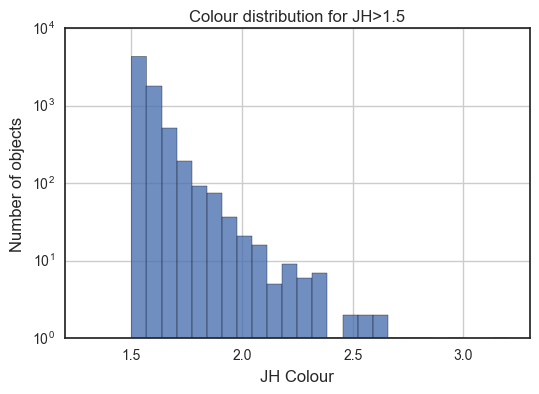

In [30]:
# Since there are more than 20 results in this query, I will display them graphically. The best way to do so is 
# a histogram because it shows the distribution of colour for the 7154 objects after the value of 1.5

# Plot histogram
Q2.hist(column='JH_colour', bins=25, alpha=0.8)
plt.xlim(1.2,3.3)
plt.title('Colour distribution for JH>1.5')
plt.ylabel("Number of objects".format(25), size=12)
plt.yscale('log')
plt.xlabel("JH Colour", size=12)
plt.savefig('1.png')

# a.3 Find the objects where Ks differs by more than 20 times the flux uncertainty from the mean flux


In [37]:
# This query was a bit tricky on the interpretation of the condition on the flux but I understood it as 
# Flux1 - avg(Flux1) < 20*dFlux1 where the average is obtained over all the Ks in each field. Since each field 
# has different number of Ks files I decided to create three separate SQL queries, one for each field


# For field 1:
Q3_que_1 = """SELECT inf.ID as ident, inf.Filter as fil, inf.FieldID as field, data.Flux1 as flux, data.StarID
        as starid FROM info as inf, All_data as data WHERE field="1" AND data.Filter="Ks" and inf.ID == data.ID_fitsfile  
        AND ABS(data.Flux1 - ((SELECT AVG(data.Flux1) FROM All_data as data WHERE data.Filter="Ks"
        AND data.StarID == data.StarID GROUP BY data.StarID))) > ABS(20*data.dFlux1)"""

Q3_1 = pd.read_sql(Q3_que_1, con)

Ks_1 = Q3_1[Q3_1.fil  =="Ks"]
Ks4 = Q3_1[Q3_1.fil  =="Ks"][Ks_1.ident==4]
Ks5 = Q3_1[Q3_1.fil  =="Ks"][Ks_1.ident==5]
Ks6 = Q3_1[Q3_1.fil  =="Ks"][Ks_1.ident==6]

print 'Objects that fulfil the requirement in field 1:   ', len(Q3_1)

# For field 2:
Q3_que_2 = """SELECT inf.ID as ident, inf.Filter as fil, inf.FieldID as field, data.Flux1 as flux, data.StarID
        as starid FROM info as inf, All_data as data WHERE field="2" AND data.Filter="Ks" and inf.ID == data.ID_fitsfile  
        AND ABS(data.Flux1 - ((SELECT AVG(data.Flux1) FROM All_data as data WHERE data.Filter="Ks"
        AND data.StarID == data.StarID GROUP BY data.StarID))) > ABS(20*data.dFlux1)"""

Q3_2 = pd.read_sql(Q3_que_2, con)

Ks_2 = Q3_2[Q3_2.fil  =="Ks"]
Ks11 = Q3_2[Q3_2.fil  =="Ks"][Ks_2.ident==11]

print 'Objects that fulfil the requirement in field 2:   ', len(Q3_2)

# For field 3:
Q3_que_3 = """SELECT inf.ID as ident, inf.Filter as fil, inf.FieldID as field, data.Flux1 as flux, data.StarID
        as starid FROM info as inf, All_data as data WHERE field="3" AND data.Filter="Ks" and inf.ID == data.ID_fitsfile  
        AND ABS(data.Flux1 - ((SELECT AVG(data.Flux1) FROM All_data as data WHERE data.Filter="Ks"
        AND data.StarID == data.StarID GROUP BY data.StarID))) > ABS(20*data.dFlux1)"""

Q3_3 = pd.read_sql(Q3_que_3, con)

Ks_3 = Q3_3[Q3_3.fil  =="Ks"]
Ks16 = Q3_3[Q3_3.fil  =="Ks"][Ks_3.ident==16]
Ks17 = Q3_3[Q3_3.fil  =="Ks"][Ks_3.ident==17]

# Print the results for each field but most importantly for all the files with Ks:
print 'Objects that fulfil the requirement in field 3:   ', len(Q3_3)
print '\n'
print 'Objects that fulfil the condition in file "4":   ', len(Ks4)
print 'Objects that fulfil the condition in file "5":   ', len(Ks5)
print 'Objects that fulfil the condition in file "6":   ', len(Ks6)
print 'Objects that fulfil the condition in file "11":  ', len(Ks11)
print 'Objects that fulfil the condition in file "16":  ', len(Ks16)
print 'Objects that fulfil the condition in file "17":  ', len(Ks17)

Objects that fulfil the requirement in field 1:    20640
Objects that fulfil the requirement in field 2:    6593
Objects that fulfil the requirement in field 3:    13458


Objects that fulfil the condition in file "4":    6629
Objects that fulfil the condition in file "5":    6639
Objects that fulfil the condition in file "6":    7372
Objects that fulfil the condition in file "11":   6593
Objects that fulfil the condition in file "16":   6871
Objects that fulfil the condition in file "17":   6587


In [38]:
# Just in case the definition of this question was not well interpreted, 
# I also designed a query that assumes Flux1>20*dFlux1 as the condition on the flux uncertainty.
# In that case, please just uncomment this section and forget about the previous interpretation.


#Q3_que = """SELECT inf.ID as ident, inf.Filter as fil, data.Flux1 as flux, data.StarID as starid FROM info as inf,
        #All_data as data WHERE data.Filter="Ks" and inf.ID == data.ID_fitsfile  
        #AND data.Flux1 >  ABS(20*data.dFlux1)"""

#Q3 = pd.read_sql(Q3_que, con)

#Ks = Q3[Q3.fil  =="Ks"]
#Ks4 = Q3[Q3.fil  =="Ks"][Ks.ident==4]
#Ks5 = Q3[Q3.fil  =="Ks"][Ks.ident==5]
#Ks6 = Q3[Q3.fil  =="Ks"][Ks.ident==6]
#Ks11 = Q3[Q3.fil  =="Ks"][Ks.ident==11]
#Ks16 = Q3[Q3.fil  =="Ks"][Ks.ident==16]
#Ks17 = Q3[Q3.fil  =="Ks"][Ks.ident==17]

# The total number of objects
#print len(Q3)

#The number in each individual case
#print 'Objects where Flux1 > 20*dFlux1 in file "4":   ', len(Ks4)
#print 'Objects where Flux1 > 20*dFlux1 in file "5":   ', len(Ks5)
#print 'Objects where Flux1 > 20*dFlux1 in file "6":   ', len(Ks6)
#print 'Objects where Flux1 > 20*dFlux1 in file "11":  ', len(Ks11)
#print 'Objects where Flux1 > 20*dFlux1 in file "16":  ', len(Ks16)
#print 'Objects where Flux1 > 20*dFlux1 in file "17":  ', len(Ks17)

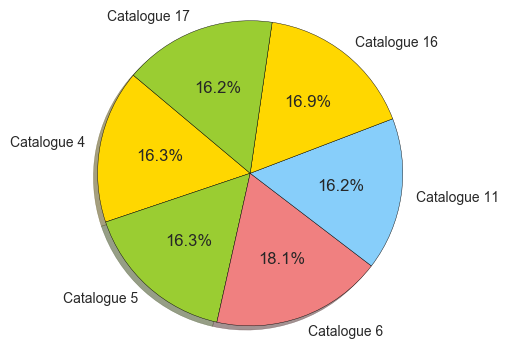

In [39]:
# Plot the results of the query in a pie chart

labels = 'Catalogue 4', 'Catalogue 5', 'Catalogue 6', 'Catalogue 11', 'Catalogue 16', 'Catalogue 17'
sizes = [len(Ks4), len(Ks5), len(Ks6), len(Ks11), len(Ks16), len(Ks17)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('2.png')

# a.4 Find all catalogues that exist for a given field

In [40]:
# I have to go through all the fieldsso my initial for loop goes from 1 to 4. 
for i in range (1, 4):

    Q4_que = """SELECT fieldid, file FROM (SELECT inf.name_file as file, inf.FieldID as fieldid FROM info as inf) 
              WHERE fieldid == {}""".format(i)

    Q4 = con.execute(Q4_que)

    print ''
    # Here I want to get the name of the field in the current run of the loop
    print "Field {}:".format(i)  
    for row in Q4:
        # And here I print the name of the files that belong to that field.
        print "File name: {0}".format(row[1])   


Field 1:
File name: Field-1-Z
File name: Field-1-J
File name: Field-1-H
File name: Field-1-Ks-E002
File name: Field-1-Ks-E001
File name: Field-1-Ks-E003
File name: Field-1-Y

Field 2:
File name: Field-2-Z
File name: Field-2-J
File name: Field-2-H
File name: Field-2-Ks-E001
File name: Field-2-Y

Field 3:
File name: Field-3-Z
File name: Field-3-J
File name: Field-3-H
File name: Field-3-Ks-E002
File name: Field-3-Ks-E001
File name: Field-3-Y


# a.5 For a given image I would like to retrieve the Y,Z,J,H and Ks magnitudes for all stars with S/N > 30 in Y,Z,J,H and Ks

In [41]:
# There are three fields so here we can choose the field that we want to study. This is what the user can chance
# accordingly, just comment and uncomment to study the desired field. 

fieldID = 1
#fieldID = 2
#fieldID = 3

# Write string for query. In this case, I choose field_number 1 and make the filtering according
# to S/N >30
Q5_que_filter = """SELECT inf.ID as ident, inf.Filter as fil, data.Mag1 as mag, data.StarID as starid 
        FROM info as inf, All_data as data WHERE inf.FieldID == {} AND data.Class=-1 AND inf.ID ==
        data.ID_fitsfile AND data.SN > 30""".format(fieldID)

# Execute query
Q5_filter = con.execute(Q5_que_filter)

# Since I need to use the data, I create a panda data frame with it:
Q5 = pd.read_sql(Q5_que_filter, con)

# And now select for all the filters using the defined filter:
Y   = Q5[(Q5.fil == "Y")].mag.values
Z   = Q5[(Q5.fil == "Z")].mag.values
J   = Q5[(Q5.fil == "J")].mag.values
H   = Q5[(Q5.fil == "H")].mag.values
Ks  = Q5[Q5.fil  =="Ks"]
Ks4 = Q5[Q5.fil  =="Ks"][Ks.ident==4].mag.values
Ks5 = Q5[Q5.fil  =="Ks"][Ks.ident==5].mag.values
Ks6 = Q5[Q5.fil  =="Ks"][Ks.ident==6].mag.values
Ks11 = Q5[Q5.fil  =="Ks"][Ks.ident==11].mag.values
Ks16 = Q5[Q5.fil  =="Ks"][Ks.ident==16].mag.values
Ks17 = Q5[Q5.fil  =="Ks"][Ks.ident==17].mag.values

# Check the number of stars that match the criterium of S/N > 30:
print 'Stars with SN>30 in total:', len(Q5.mag)
print ''
print 'Where from each filter we have:'
print ''
print 'Stars with SN>30 in Y:  ', len(Q5[(Q5.fil == "Y")].mag.values)
print 'Stars with SN>30 in Z:  ', len(Q5[(Q5.fil == "Z")].mag.values)
print 'Stars with SN>30 in J:  ', len(Q5[(Q5.fil == "J")].mag.values)
print 'Stars with SN>30 in H:  ', len(Q5[(Q5.fil == "H")].mag.values)
print 'Stars with SN>30 in Ks4:', len(Ks4)
print 'Stars with SN>30 in Ks5:', len(Ks5)
print 'Stars with SN>30 in Ks11:', len(Ks11)
print 'Stars with SN>30 in Ks16:', len(Ks16)
print 'Stars with SN>30 in Ks17:', len(Ks17)


Stars with SN>30 in total: 34529

Where from each filter we have:

Stars with SN>30 in Y:   4218
Stars with SN>30 in Z:   3740
Stars with SN>30 in J:   4829
Stars with SN>30 in H:   6356
Stars with SN>30 in Ks4: 4616
Stars with SN>30 in Ks5: 4196
Stars with SN>30 in Ks11: 0
Stars with SN>30 in Ks16: 0
Stars with SN>30 in Ks17: 0


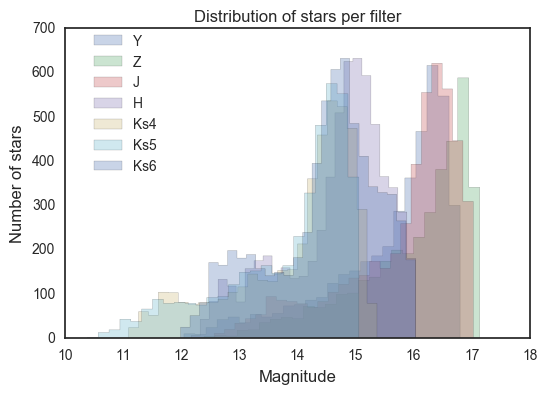

In [42]:
# One way to visualize the data is using a histogram for all the filters:

plt.hist(Y,histtype='stepfilled', bins=25, label='Y', alpha=0.3)
plt.hist(Z,histtype='stepfilled', bins=25, label='Z', alpha=0.3)
plt.hist(J,histtype='stepfilled', bins=25, label='J', alpha=0.3)
plt.hist(H,histtype='stepfilled', bins=25, label='H', alpha=0.3)
plt.hist(Ks4,histtype='stepfilled', bins=25, label='Ks4', alpha=0.3)
plt.hist(Ks5,histtype='stepfilled', bins=25, label='Ks5', alpha=0.3)
plt.hist(Ks6,histtype='stepfilled', bins=25, label='Ks6', alpha=0.3)
plt.title('Distribution of stars per filter')
plt.ylabel("Number of stars".format(25), size=12)
plt.xlabel("Magnitude", size=12)
plt.legend(bbox_to_anchor=(0.05, 1), loc=2, borderaxespad=0.)
plt.savefig('3.png')

/home/juancho/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


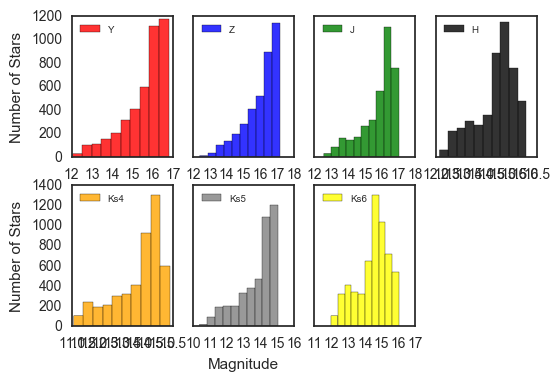

In [43]:
# But we see that the distribution is not very clear so it's better to do a histogram for 
# each filter individually:

fig, axs = plt.subplots(2,4)
ax = axs.ravel()
fig.figsize=(10, 6)

ax[0].set_ylabel('Number of Stars')
ax[0].hist(Y, color='red', alpha=0.8, label='Y')
ax[0].legend(prop={'size': 7}, loc=2)

ax[1].hist(Z, color='blue', alpha=0.8, label='Z')
ax[1].set_yticklabels([])
ax[1].legend(prop={'size': 7}, loc=2)

ax[2].hist(J, color='green', alpha=0.8, label='J')
ax[2].set_yticklabels([])
ax[2].legend(prop={'size': 7}, loc=2)

ax[3].hist(H, color='black', alpha=0.8, label='H')
ax[3].set_yticklabels([])
ax[3].legend(prop={'size': 7}, loc=2)

ax[4].hist(Ks4, color='orange', alpha=0.8, label='Ks4')
ax[4].set_ylabel('Number of Stars')
ax[4].legend(prop={'size': 7}, loc=2)

ax[5].hist(Ks5, color='grey', alpha=0.8, label='Ks5')
ax[5].set_yticklabels([])
ax[5].set_xlabel('Magnitude')
ax[5].legend(prop={'size': 7}, loc=2)

ax[6].hist(Ks6, color='yellow', alpha=0.8, label='Ks6')
ax[6].set_yticklabels([])
ax[6].legend(prop={'size': 7}, loc=2)

ax[7].set_yticklabels([])
ax[7].set_xticklabels([])
ax[7].spines['top'].set_visible(False)
ax[7].spines['right'].set_visible(False)
ax[7].spines['bottom'].set_visible(False)
ax[7].spines['left'].set_visible(False)
ax[7].get_xaxis().set_ticks([])
ax[7].get_yaxis().set_ticks([])
ax[7].legend()
plt.savefig('4.png')